In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2021-11-05 17:03:09--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... 

connected.
HTTP request sent, awaiting response... 

200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip.1’

tiny-imagenet-200.z   0%[                    ]       0  --.-KB/s               

tiny-imagenet-200.z   0%[                    ]  63.50K   308KB/s               

tiny-imagenet-200.z   0%[                    ] 175.45K   425KB/s               

tiny-imagenet-200.z   0%[                    ] 344.93K   559KB/s               

tiny-imagenet-200.z   0%[                    ] 666.93K   810KB/s               

tiny-imagenet-200.z   0%[                    ]   1.14M  1.10MB/s               

tiny-imagenet-200.z   0%[                    ]   1.89M  1.53MB/s               

tiny-imagenet-200.z   1%[                    ]   3.03M  2.10MB/s               

tiny-imagenet-200.z   1%[                    ]   4.70M  2.85MB/s               

tiny-imagenet-200.z   3%[                    ]   7.11M  3.83MB/s               

tiny-imagenet-200.z   4%[                    ]  10.56M  5.12MB/s               

tiny-imagenet-200.z   6%[>                   ]  15.57M  6.86MB/s               

tiny-imagenet-200.z   9%[>                   ]  22.44M  9.07MB/s               

tiny-imagenet-200.z  13%[=>                  ]  31.17M  11.6MB/s               

tiny-imagenet-200.z  16%[==>                 ]  39.21M  13.6MB/s               

tiny-imagenet-200.z  19%[==>                 ]  46.65M  15.1MB/s    eta 13s    

tiny-imagenet-200.z  23%[===>                ]  55.07M  16.8MB/s    eta 13s    

tiny-imagenet-200.z  26%[====>               ]  63.63M  18.2MB/s    eta 13s    

tiny-imagenet-200.z  30%[=====>              ]  72.15M  20.7MB/s    eta 13s    

tiny-imagenet-200.z  33%[=====>              ]  79.77M  22.8MB/s    eta 13s    

tiny-imagenet-200.z  36%[======>             ]  87.45M  25.0MB/s    eta 7s     

tiny-imagenet-200.z  40%[=======>            ]  95.73M  28.8MB/s    eta 7s     

tiny-imagenet-200.z  44%[=======>            ] 104.18M  31.2MB/s    eta 7s     

tiny-imagenet-200.z  47%[========>           ] 112.91M  33.5MB/s    eta 7s     

tiny-imagenet-200.z  51%[=========>          ] 121.33M  36.6MB/s    eta 7s     

tiny-imagenet-200.z  54%[=========>          ] 128.80M  38.1MB/s    eta 4s     

tiny-imagenet-200.z  57%[==========>         ] 136.27M  38.9MB/s    eta 4s     

tiny-imagenet-200.z  61%[===========>        ] 144.97M  39.5MB/s    eta 4s     

tiny-imagenet-200.z  64%[===========>        ] 153.40M  39.7MB/s    eta 4s     

tiny-imagenet-200.z  68%[============>       ] 161.96M  39.8MB/s    eta 4s     

tiny-imagenet-200.z  72%[=============>      ] 170.63M  39.9MB/s    eta 2s     

tiny-imagenet-200.z  75%[==============>     ] 178.86M  40.3MB/s    eta 2s     

tiny-imagenet-200.z  78%[==============>     ] 185.99M  40.1MB/s    eta 2s     

tiny-imagenet-200.z  82%[===============>    ] 194.33M  39.9MB/s    eta 2s     

tiny-imagenet-200.z  85%[================>   ] 203.20M  40.2MB/s    eta 2s     

tiny-imagenet-200.z  89%[================>   ] 211.78M  40.2MB/s    eta 1s     

tiny-imagenet-200.z  92%[=================>  ] 219.60M  40.0MB/s    eta 1s     

tiny-imagenet-200.z  96%[==================> ] 227.25M  40.2MB/s    eta 1s     

tiny-imagenet-200.z  99%[==================> ] 234.61M  39.8MB/s    eta 1s     

tiny-imagenet-200.z 100%[===================>] 236.61M  40.1MB/s    in 7.8s    

2021-11-05 17:03:17 (30.3 MB/s) - ‘tiny-imagenet-200.zip.1’ saved [248100043/248100043]



In [ ]:
!unzip -q tiny-imagenet-200.zip && ls tiny-imagenet-200

test  train  val  wnids.txt  words.txt


In [ ]:
import torch
import os
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
training_data_list = []
le = LabelEncoder()
for folder in os.listdir('./tiny-imagenet-200/train/'):
  label = folder  # The name of the folder is the label of the images it contains




  for file in os.listdir('./tiny-imagenet-200/train/' + folder + '/images/'):
    file_dir = './tiny-imagenet-200/train/' + folder + '/images/' + file
    training_data_list.append((file_dir, label))

lab=[]
for i in training_data_list:
  lab.append(i[1])
label = le.fit_transform(lab)

# training_data_new_list=[]


# for i in label:
#    for file in os.listdir('./tiny-imagenet-200/train/' + folder + '/images/'):
#      file_dir = './tiny-imagenet-200/train/' + folder + '/images/' + file
#      training_data_new_list.append((file_dir,i))



      

In [ ]:
training_data_list = np.asarray(training_data_list)
for i in range(100000):
  training_data_list[i][1]=label[i]

In [ ]:
training_data_list = tuple(map(tuple,training_data_list))

In [ ]:
with open('./training_data_list.json', 'w') as f:
  json.dump(training_data_list, f)
  

In [ ]:
testing_data_list = []
with open('./tiny-imagenet-200/val/val_annotations.txt', 'r') as f:
  for line in f.readlines():
    file, label = line.split()[0:2]
    file_dir = './tiny-imagenet-200/val/images/' + file
    testing_data_list.append((file_dir, label))
lab=[]
for i in testing_data_list:
  lab.append(i[1])
label = le.fit_transform(lab)


In [ ]:
testing_data_list = np.asarray(testing_data_list)
for i in range(10000):
  testing_data_list[i][1]=label[i]

In [ ]:
testing_data_list = tuple(map(tuple,testing_data_list))

In [ ]:
with open('./testing_data_list.json', 'w') as f:
  json.dump(testing_data_list, f)

In [ ]:
from torchvision.transforms import ToTensor
from PIL import Image,ImageOps
from torch.utils.data import Dataset
from torch.utils.data.dataloader import *
img_to_tensor = ToTensor()
# transforms.Resize(224,224
# transforms.Resize((224,224))

In [ ]:
# dim =3
class TrainingDataset(Dataset):
  def __init__(self, list='./training_data_list.json'):
    with open(list, 'r') as f:
      self.list = json.load(f)

  def __getitem__(self, index):
    img_dir, label = self.list[index]
    img = Image.open(img_dir).convert('RGB')
    # img = ImageOps.grayscale(img)
    # img.reshape(224,224,3)
    # img = rgb2gray(img)
    tensor = img_to_tensor(img)
    
    # tensor.Resize((224,224))
    # tensor = tensor.unsqueeze(1)  # if torch tensor
    # torch.unsqueeze(tensor, dim, out=None)
    # tensor.reshape(224,224,3)
    return tensor, label

  def __len__(self):
    return len(self.list)

In [ ]:
class TestingDataset(Dataset):
  def __init__(self, list='./testing_data_list.json'):
    with open(list, 'r') as f:
      self.list = json.load(f)

  def __getitem__(self, index):
    img_dir, label = self.list[index]
    img = Image.open(img_dir).convert('RGB')
    # img = Image.open(img_dir)
    # img = ImageOps.grayscale(img)
    
    tensor = img_to_tensor(img)
    # tensor = tensor.unsqueeze(1)  # if torch tensor
    return tensor, label

  def __len__(self):
    return len(self.list)

In [ ]:
data_loader =torch.utils.data.DataLoader(TrainingDataset(),batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(TestingDataset(),batch_size=256, shuffle=False)
# for i, (tensor, label) in enumerate(test_loader):
#   print ( label)
  


In [ ]:
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

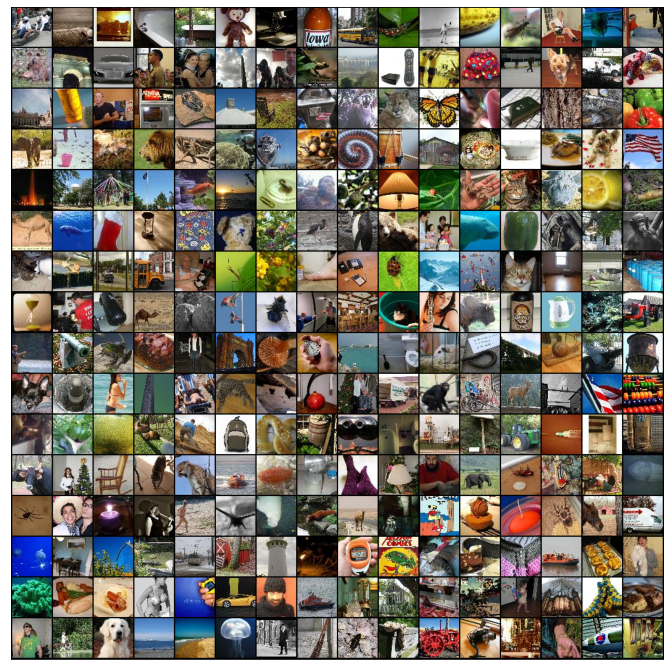

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(test_loader)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        # convolutional layers 
        self.conv_layers = nn.Sequential(
            nn.Conv2d(self.in_channels, 32, kernel_size=3, padding=1),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.Conv2d(128,256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

           
           
        )
        # fully connected linear layers
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=65536, out_features=2048),
            nn.ReLU(),
            nn.Dropout2d(0.8),
            nn.Linear(in_features=2048, out_features=200),
            # nn.ReLU(),
            # nn.Dropout2d(0.5),
            # nn.Linear(in_features=2048, out_features=self.num_classes)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        # flatten to prepare for the fully connected layers
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x


# mod=ResNet18_block(64,64)
mod=Net(3,200)
print(mod)
mod=mod.to(device)

# xx=torch.randn(1,3,224,224)
# xx.to(device)
# # print(xx)
# print(mod.forward(xx))

# model = Net()
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(mod.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
# model.to(device) 

Net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=65536, out_features=2048, bias=True)
    (1): ReLU()
    (2): Dropout2d(p=0.8, inplace=False)
    (3): Linear(in_features=2048, out_features=200, bias=True)
  )
)


In [ ]:
epochs = 10
steps = 0
running_loss = 0
print_every = 10
train_losses, test_losses = [], []
train_acc, test_acc = [], []
for epoch in range(epochs):
    for inputs, labels in data_loader:
        # labels = labels
        labels = list(map(int, labels))
        steps += 1
        # inputs = int(inputs)
        # labels = int(labels)
        # inputs = inputs.numpy()
        # labels = np.arraylabels
        # inputs, labels = inputs.to(device), labels.to(device)
        inputs = torch.tensor(inputs).to(device)
        labels = torch.tensor(labels).to(device)
        optimizer.zero_grad()

        
        logps = mod.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            mod.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    labels = list(map(int, labels))
                    inputs, labels = torch.tensor(inputs).to(device), torch.tensor(labels).to(device)
                    logps = mod.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                    
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            train_losses.append(running_loss/len(data_loader))
            test_losses.append(test_loss/len(test_loader))
            
            #train_acc.append(running_loss/len(trainloader))
            test_acc.append(accuracy/len(test_loader))  
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            mod.train()


/tmp/ipykernel_68/1332142231.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs).to(device)


RuntimeError: CUDA out of memory. Tried to allocate 128.00 MiB (GPU 0; 7.94 GiB total capacity; 7.07 GiB already allocated; 75.62 MiB free; 7.11 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF